Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years.The goal of this analysis is to build a model that borrowers can use to help make the best financial decisions.

In [1]:
import pandas as pd
import numpy as py
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Import Data

In [2]:
#test data
test = pd.read_csv("../input/GiveMeSomeCredit/cs-test.csv")

In [3]:
#train data
training = pd.read_csv("../input/GiveMeSomeCredit/cs-training.csv")

In [4]:
#data dictionary
data_dictionary = pd.read_excel("../input/GiveMeSomeCredit/Data Dictionary.xls")

In [5]:
training.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


<br>

Exploratory Data Analysis

In [6]:
training.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

Null Values in Monthly Income and Number of Dependents : Need to do cleaning of the data before modeling.

In [7]:
test.isna().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

Text(0.5, 1.0, 'Distribution of the Defaulters in the data')

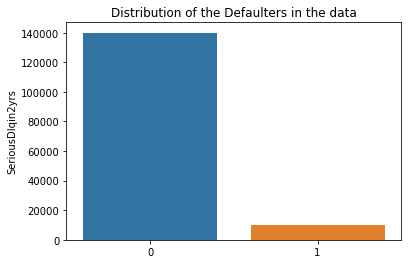

In [8]:
sns.barplot(x=training['SeriousDlqin2yrs'].value_counts().index,y=training['SeriousDlqin2yrs'].value_counts())
plt.title("Distribution of the Defaulters in the data")

**ANALYSIS OF AGE**

Minimum Age 0
Maximum Age 109
Median Age 52.0
Mean Age 52.295206666666665
Mode Age 49


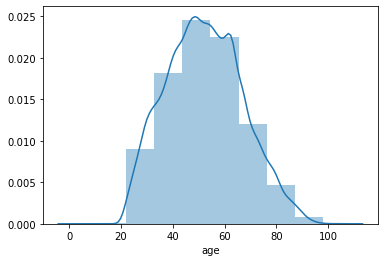

In [9]:
print("Minimum Age",training.age.min())
print("Maximum Age",training.age.max())
print("Median Age",training.age.median())
print("Mean Age",training.age.mean())
print("Mode Age",training.age.mode()[0])

sns.distplot(training['age'],bins=10)

In [10]:
training.loc[training['age'] == 0, 'age']

65695    0
Name: age, dtype: int64

It can be observed that the data includes a record with age = 0 which is not a valid age ,updating the record with mode age of 49.

In [11]:
training.loc[training['age'] == 0, 'age'] = training.age.mode()[0]

Checking for the age distribution for the defaulters and non-defaulters

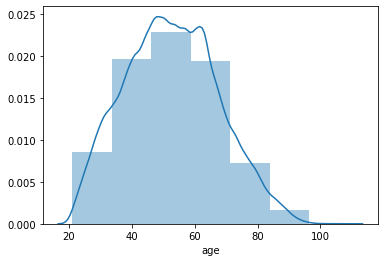

In [12]:
default_0 = training[training['SeriousDlqin2yrs'] == 0]
sns.distplot(default_0['age'],bins=7)

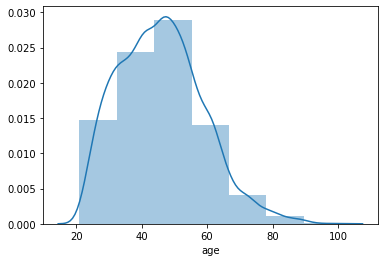

In [13]:
default_1 = training[training['SeriousDlqin2yrs'] == 1]
sns.distplot(default_1['age'],bins=7)

People with age group between 35 - 55 are the major defaulters in the data

DebtRatio vs Age

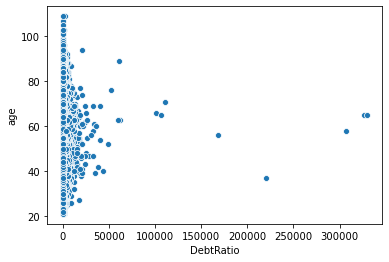

In [14]:
sns.scatterplot(x=training['DebtRatio'],y=training['age'])

DebtRatio vs RevolvingUtilizationOfUnsecuredLines

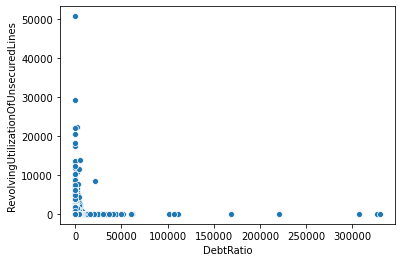

In [15]:
sns.scatterplot(x=training['DebtRatio'],y=training['RevolvingUtilizationOfUnsecuredLines'])

NumberOfOpenCreditLinesAndLoans vs Monthly Income

In [16]:
training['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [17]:
monthly_income_less_10000 = training[training['MonthlyIncome'] < training['MonthlyIncome'].quantile(0.99)]

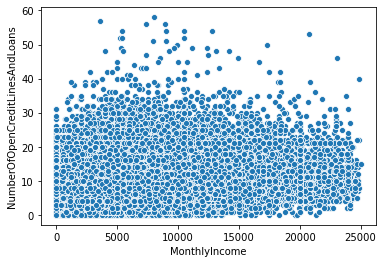

In [18]:
sns.scatterplot(x=monthly_income_less_10000['MonthlyIncome'],y=monthly_income_less_10000['NumberOfOpenCreditLinesAndLoans'])

**Correlation Plot:**

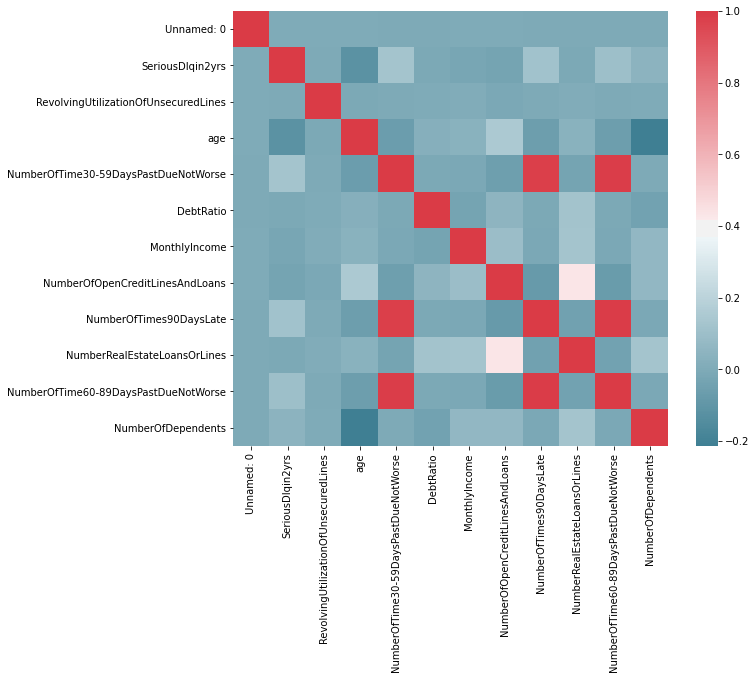

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
corr = training.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Numberoftime90daysLate is highly correlated with NumberofTime60-89DaysPastDueNotWorse as both of the variables are denoting the defaulters days.

<br>

**MONTHLY INCOME**

Minimum MonthlyIncome 0.0
Maximum MonthlyIncome 3008750.0
Median MonthlyIncome 5400.0
Mean MonthlyIncome 6670.221237392844
Mode MonthlyIncome 5000.0
Null Values 29731


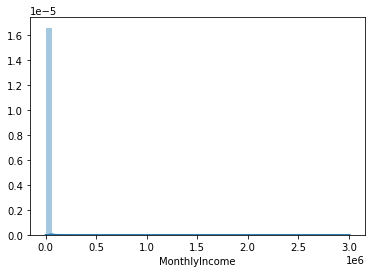

In [20]:
print("Minimum MonthlyIncome",training.MonthlyIncome.min())
print("Maximum MonthlyIncome",training.MonthlyIncome.max())
print("Median MonthlyIncome",training.MonthlyIncome.median())
print("Mean MonthlyIncome",training.MonthlyIncome.mean())
print("Mode MonthlyIncome",training.MonthlyIncome.mode()[0])
print("Null Values",training.MonthlyIncome.isna().sum())

sns.distplot(training['MonthlyIncome'])

As we have many outliers in the data for Monthly Income we would be replacing the nulls in the Monthly income with the Median Value of the Monthly Income.

In [21]:
training.loc[training.MonthlyIncome.isna(),'MonthlyIncome'] = training.MonthlyIncome.median()

<br>

**Number of Dependents**

Minimum NumberOfDependents 0.0
Maximum NumberOfDependents 20.0
Median NumberOfDependents 0.0
Mean NumberOfDependents 0.7572222678605657
Mode NumberOfDependents 0.0
Null Values 3924


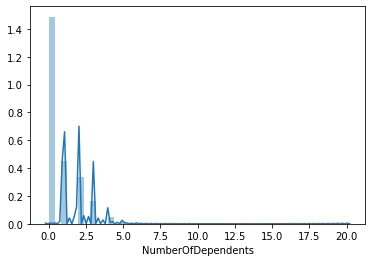

In [22]:
print("Minimum NumberOfDependents",training.NumberOfDependents.min())
print("Maximum NumberOfDependents",training.NumberOfDependents.max())
print("Median NumberOfDependents",training.NumberOfDependents.median())
print("Mean NumberOfDependents",training.NumberOfDependents.mean())
print("Mode NumberOfDependents",training.NumberOfDependents.mode()[0])
print("Null Values",training.NumberOfDependents.isna().sum())

sns.distplot(training['NumberOfDependents'])

As there are many outliers in the NumberOfdependents it is better to replace the nulls of the data with the required median value of 0.

In [23]:
training.loc[training.NumberOfDependents.isna(),'NumberOfDependents'] = training.NumberOfDependents.median()

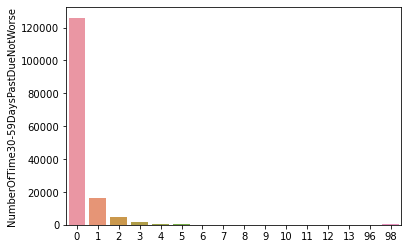

In [24]:
sns.barplot(x=training['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().index,y=training['NumberOfTime30-59DaysPastDueNotWorse'].value_counts())

In [25]:
training.isna().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Now that there are no null values we would be starting with modeling of data.


**XGBoost Classifier**

In [26]:
#Spliting of Data:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,roc_curve

In [27]:
y = training.loc[:,training.columns.isin(['SeriousDlqin2yrs'])]
X_attributes=[
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines',
       'NumberOfDependents'] # Excluding NumberOfTime60-89DaysPastDueNotWorse' because of strong collinearity
X = training.loc[:,training.columns.isin(X_attributes)]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic",random_state=42)

In [30]:
xgb_model.fit(X_train,y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
y_pred = xgb_model.predict(X_test)
y_probab = xgb_model.predict_proba(X_test)

In [32]:
accuracy_score(y_pred,y_test)

0.9366333333333333

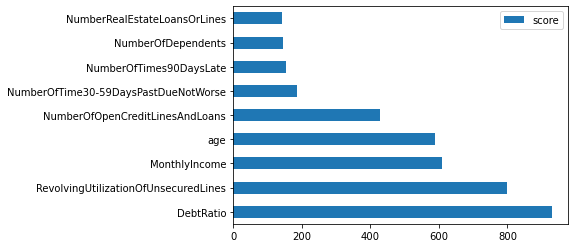

In [33]:
#Feature Importance Plot
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

In [34]:
def plot_roc(y_test,probs):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

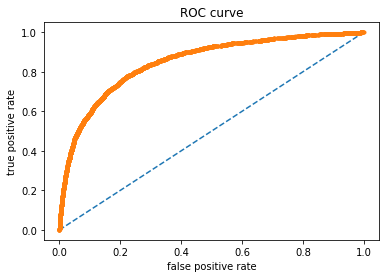

In [35]:
plot_roc(y_test,y_probab[:,1])

Making Predictions on Test Data..!!

In [36]:
test.isna().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [37]:
test.loc[test['MonthlyIncome'].isna(),'MonthlyIncome'] = test['MonthlyIncome'].dropna().median()
test.loc[test['NumberOfDependents'].isna(),'NumberOfDependents'] = test['NumberOfDependents'].dropna().mode()

In [38]:
test_proba = xgb_model.predict_proba(test.loc[:,test.columns.isin(X_attributes)])

In [55]:
len(np.arange(1,len(test_proba)+1))

101503

In [53]:
len(test_proba)

101503

In [56]:
df = pd.DataFrame({'Id':np.arange(1,len(test_proba)+1),'Probability':test_proba[:,1]})

In [57]:
#Test data predicitions
df

,Id,Probability
0,1,0.095347
1,2,0.049978
2,3,0.007658
3,4,0.101871
4,5,0.103987
...,...,...
101498,101499,0.055325
101499,101500,0.443840
101500,101501,0.005765
101501,101502,0.012573


In [41]:
!pwd

/kaggle/working


In [58]:
df.to_csv('submission.csv', index = False)

MODEL INTERPRETATION WITH SHAP

In [43]:
import shap

mybooster=xgb_model.get_booster()

model_bytearray = mybooster.save_raw()[4:]

def myfun(self=None):
    return model_bytearray

mybooster.save_raw = myfun

In [44]:
explainerXGB = shap.TreeExplainer(mybooster)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


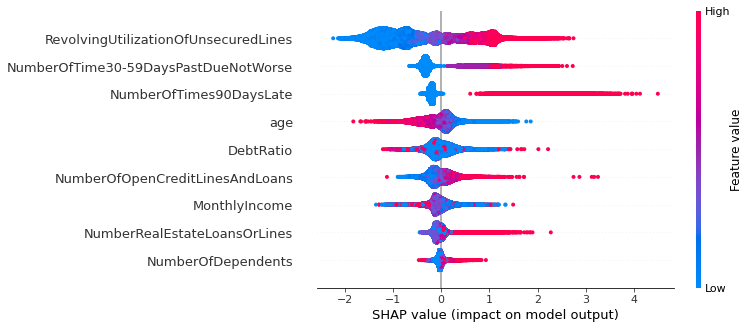

In [45]:
shap_values = explainerXGB.shap_values(X_train.loc[:,X_train.columns.isin(feature_important)])
shap.summary_plot(
    shap_values,
    X_train.loc[:,X_train.columns.isin(feature_important)],
    max_display=110,
    show=True,
)

The above SHAP summary plot for the XGBOost Model 

- Higher the RevolvingUtilizationofUnsecuredLines higher the defaulter probability
- Higher the number of times the borrower has past due more is the probability of being a defaulter.
- Lower the age high are the likelihood of being defaulter
- With more number of open credit lines and loans high are probability for being a defaulter. 
- Lower the Monthly Income higher the chances of being a defaulter
- Higher the Number of dependents and realestate loans more the probability of being a defaulter.